In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler

In [135]:
# Leer archivo CSV y cargar los datos en un DataFrame
df = pd.read_csv('/Users/aleja/OneDrive/Escritorio/Alejandra/UCM/2023/Segundo Semestre/Tesis/Datos/pimiopt.csv')
#df = df.iloc[:, 1:]  # Esto selecciona todas las filas y todas las columnas a partir de la segunda. Si fuese necesario

In [136]:
#pd.set_option('display.max_columns', None)
df

,X2000,X2030,X2445,X3315,X4845,X5205,X5225,X6045,X7230,X9585,objetivo
0,0.025904,0.017021,0.005385,0.026864,0.000000,0.159399,0.000000,0.216701,0.284303,0.332893,1.0
1,0.070831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2,0.029405,0.006587,0.029828,0.081395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.025199,0.000000,0.000000,0.008137,0.000000,0.119859,0.097740,0.152619,0.147017,0.000000,1.0
4,0.024867,0.051704,0.055301,0.234123,0.050328,0.148050,0.167169,0.381809,0.287319,0.333653,0.0
...,...,...,...,...,...,...,...,...,...,...,...
86,0.000000,0.000000,0.000340,0.000000,0.000000,0.000000,0.249390,0.362104,0.000000,0.000000,1.0
87,0.104403,0.000390,0.003099,0.010961,0.000000,0.116944,0.105470,0.166514,0.171764,0.000000,1.0
88,0.109441,0.000000,0.000000,0.000000,0.000000,0.134721,0.000000,0.361196,0.235354,0.000000,1.0
89,0.014351,0.025119,0.008061,0.029306,0.000000,0.254180,0.233385,0.177649,0.228588,0.000000,1.0


In [137]:
#Normalización del dataset
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplica la normalización a las columnas numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

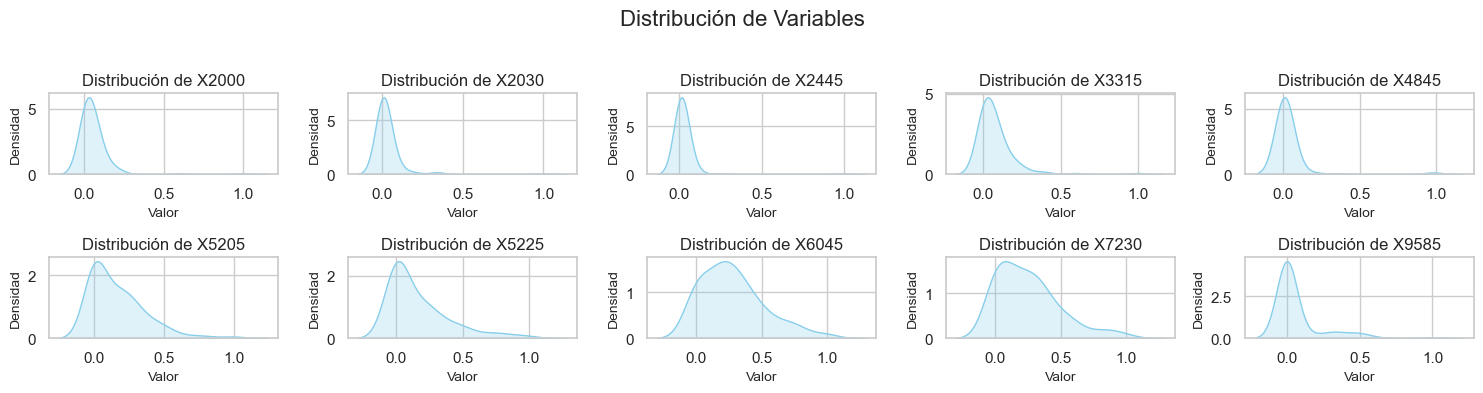

In [138]:
#Visualizar la distribución de los datos
# Configurar el estilo de los gráficos de Seaborn
sns.set(style="whitegrid")

# Obtener todas las columnas del DataFrame
columnas = df.iloc[:, :-1].columns

# Calcular el número de filas y columnas necesarias para acomodar todas las subgráficas
num_filas = (len(columnas) + 4) // 5  # Se establece 5 columnas por fila
num_columnas = min(len(columnas), 5)

# Crear la figura con subgráficos
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(15, 2 * num_filas))
fig.suptitle('Distribución de Variables', fontsize=16)

# Iterar sobre las subgráficas y las variables
for i, ax in enumerate(axes.flatten()):
    if i < len(columnas):
        variable = columnas[i]
        # Crear un gráfico de densidad para cada variable
        sns.kdeplot(df[variable], fill=True, color='skyblue', ax=ax)
        # Configuración adicional para cada subgráfico
        ax.set_title(f'Distribución de {variable}', fontsize=12)
        ax.set_xlabel('Valor', fontsize=10)
        ax.set_ylabel('Densidad', fontsize=10)
    else:
        # Ocultar los subgráficos sin variables
        ax.axis('off')

# Ajustar el diseño de los subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar la figura
plt.show()



In [139]:
from scipy.stats import ttest_ind

In [140]:
#Obtener los p-values usando ttest
# Obtener todas las columnas del DataFrame
columnas = df.columns

# Definir el grupo de referencia (por ejemplo, objetivo == 0)
grupo_referencia = 0

# Crear un DataFrame para almacenar los resultados
resultados_t_test = pd.DataFrame(columns=['Columna', 'Estadístico t', 'p-value'])

# Iterar sobre las columnas y realizar la prueba t
for columna in columnas:
    if columna != 'objetivo':  # Excluir la columna objetivo
        # Obtener las dos muestras para la columna actual y el grupo de referencia
        x = df[df['objetivo'] == grupo_referencia][columna]
        y = df[df['objetivo'] != grupo_referencia][columna]

        # Realizar la prueba t de Student para dos muestras independientes
        t_statistic, p_value = ttest_ind(x, y, equal_var=False)

        # Crear un DataFrame temporal con los resultados de la prueba actual
        resultados_temporales = pd.DataFrame({
            'Columna': [columna],
            'Estadístico t': [t_statistic],
            'p-value': [p_value]
        })

        # Concatenar el DataFrame temporal al DataFrame principal
        resultados_t_test = pd.concat([resultados_t_test, resultados_temporales], ignore_index=True)

# Imprimir la tabla de resultados
print(resultados_t_test)



  Columna  Estadístico t   p-value
0   X2000       1.608463  0.118004
1   X2030       1.287589  0.207268
2   X2445       1.312073  0.199591
3   X3315       0.959375  0.343299
4   X4845       0.632926  0.529985
5   X5205       1.680286  0.098801
6   X5225       1.992531  0.053966
7   X6045      -0.557374  0.579733
8   X7230       0.824113  0.413408
9   X9585       2.355895  0.024511


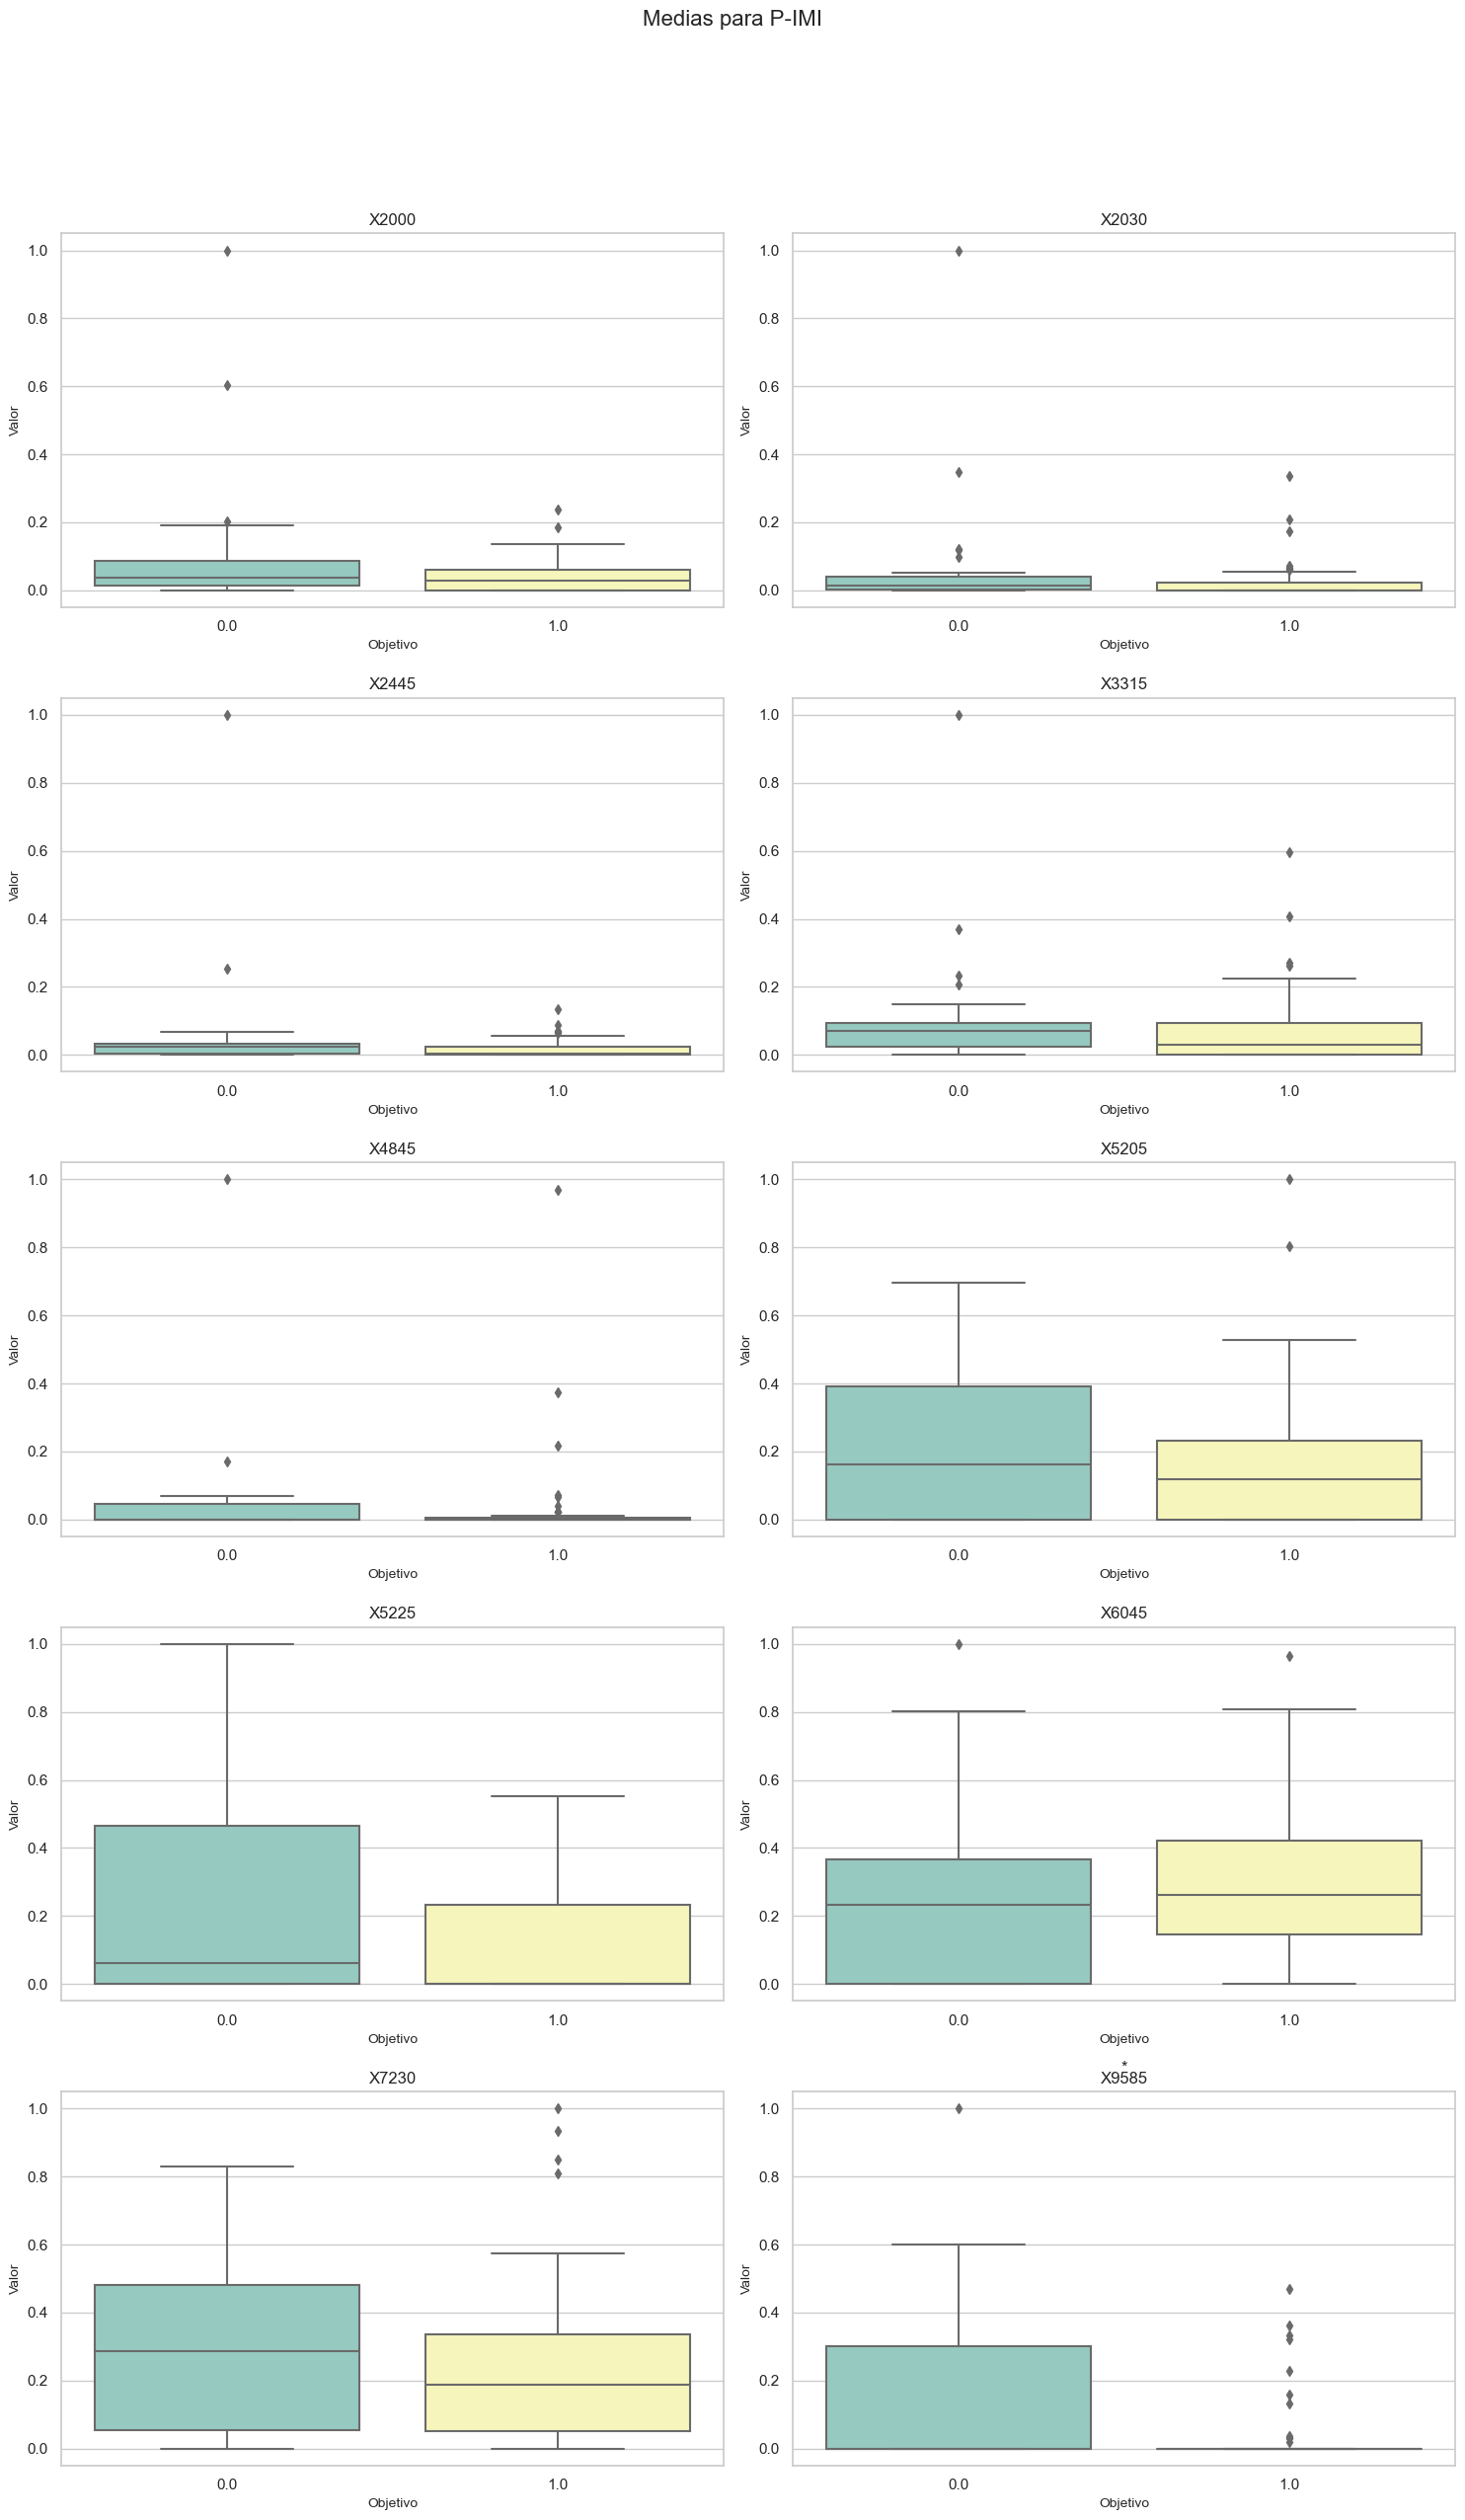

In [142]:
#Mostrar las medias de cada variable en relación a la clase
# Configurar el estilo de los gráficos de Seaborn
sns.set(style="whitegrid")

# Obtener todas las columnas del DataFrame (excluyendo 'objetivo')
columnas = df.columns[df.columns != 'objetivo']

# Calcular el número de filas y columnas necesarias para mostrar los gráficos
num_filas = len(columnas) // 2 + len(columnas) % 2
num_columnas = 2

# Crear la figura y los ejes de los subgráficos
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(15, 5 * num_filas))
fig.suptitle('Medias para P-IMI', y=1.02, fontsize=16)

# Iterar sobre las columnas y crear boxplots
for i, columna in enumerate(columnas):
    fila = i // num_columnas
    columna_subgráfico = i % num_columnas

    # Crear un boxplot en el subgráfico actual
    sns.boxplot(x='objetivo', y=columna, data=df, ax=axes[fila, columna_subgráfico], palette="Set3")

    # Configuración adicional para cada subgráfico
    axes[fila, columna_subgráfico].set_title(f'{columna}', fontsize=12)
    axes[fila, columna_subgráfico].set_xlabel('Objetivo', fontsize=10)
    axes[fila, columna_subgráfico].set_ylabel('Valor', fontsize=10)

    # Agregar asterisco sobre el título según el nivel de significancia
    p_value = resultados_t_test.loc[resultados_t_test['Columna'] == columna, 'p-value'].values[0]
    if p_value < 0.001:
        axes[fila, columna_subgráfico].text(0.5, 1.05, '***', transform=axes[fila, columna_subgráfico].transAxes,
                                            horizontalalignment='center', fontsize=12)
    elif p_value < 0.01:
        axes[fila, columna_subgráfico].text(0.5, 1.05, '**', transform=axes[fila, columna_subgráfico].transAxes,
                                            horizontalalignment='center', fontsize=12)
    elif p_value < 0.05:
        axes[fila, columna_subgráfico].text(0.5, 1.05, '*', transform=axes[fila, columna_subgráfico].transAxes,
                                            horizontalalignment='center', fontsize=12)

# Ajustar el diseño de los subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar la figura
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   objetivo  910 non-null    int32  
 1   Da        910 non-null    int32  
 2   Value     910 non-null    float64
dtypes: float64(1), int32(2)
memory usage: 14.3 KB


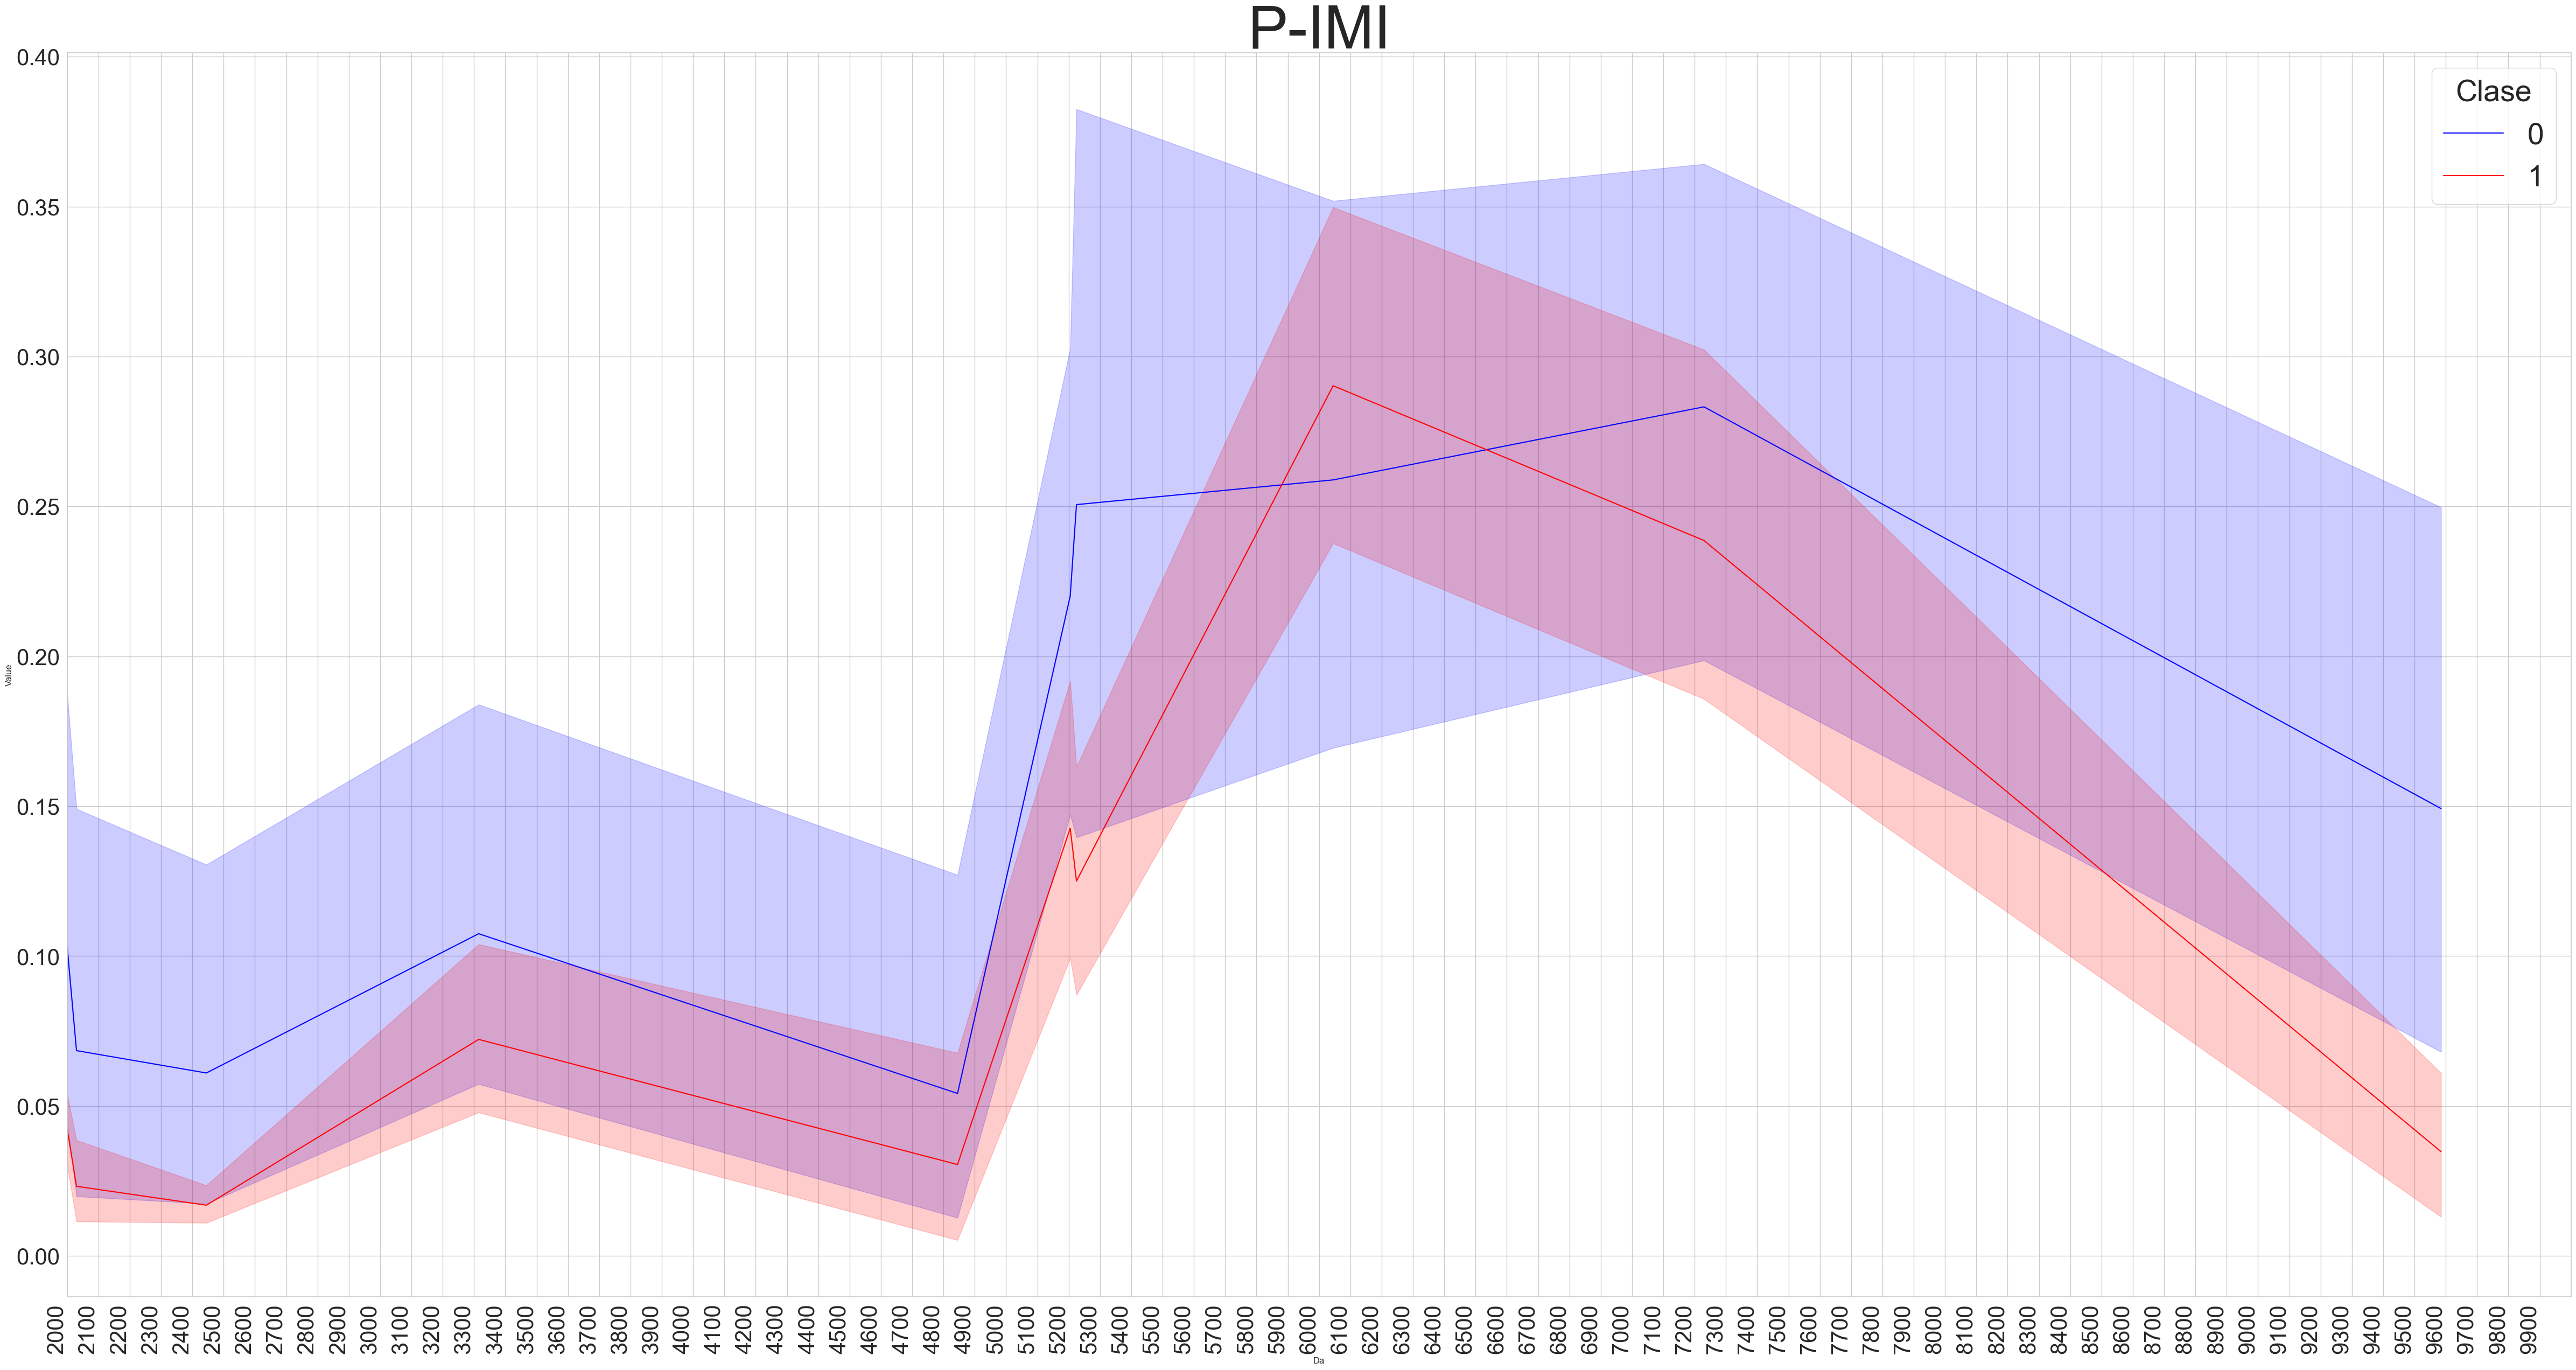

In [143]:
meltdata = df.melt('objetivo', var_name='Da', value_name='Value')
meltdata['Da'] = meltdata['Da'].str.replace(r'[^0-9]', '', regex=True).astype(int)
meltdata['objetivo'] = meltdata['objetivo'].astype(int)
meltdata.info()
plt.figure(figsize=(60,30))
plt.title('P-IMI', fontsize=80)
sns.lineplot(x='Da', y='Value', hue='objetivo', data=meltdata, palette={0: 'blue', 1: 'red'}).set(xticks=np.arange(2000, 10001, 300))
plt.legend(title='Clase', fontsize='40', title_fontsize='40')
# Configurar el formato del eje x
plt.xticks(rotation=90, ha='right')
plt.yticks(fontsize=30)  # Ajustar el tamaño de fuente del eje y
# Ajustar el tamaño de fuente de los ticks del eje x
plt.gca().tick_params(axis='x', labelsize=30)
# Ajustar la escala del eje x
plt.xlim(2000, 10000)
plt.xticks(np.arange(2000, 10000, 100))
plt.show()